In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
get_ipython().magic(u'matplotlib inline')

 <h2 style="color:pink"> load datasets</h2>


In [134]:
glass = pd.read_csv('glass.data',header=None)
semeion = pd.DataFrame(np.loadtxt('semeion.data'))
wdbc = pd.read_csv('wdbc.data', header=None)
wpbc = pd.read_csv('wpbc.data', header=None)


<h2 style="color:blue"> read glass dataset </h2>
<ul>
    <li>number of features: 9</li>
    <li>number of classes: 7</li>
    <li>number of data: 214</li>
</ul>


In [3]:
Xg = glass.drop([0,10],axis=1)
Yg = glass[10]
Xg.head()


,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0


<h2 style="color:blue"> read semeion dataset </h2>
<ul>
    <li>number of features: 256, boolean</li>
    <li>number of classes: 10</li>
    <li>number of data: 1593</li>
</ul>


In [4]:
Ys = semeion[256]
for i in range(10):
    Ys[semeion[256+i]==1] = i+1
Xs = semeion.drop(range(256,266),axis=1)
Xs.shape


(1593, 256)

<h2 style="color:blue"> read wdbc dataset </h2>
<ul>
    <li>number of features: 30</li>
    <li>number of classes: 2</li>
    <li>number of data: 569</li>
</ul>


In [48]:
Xwd = wdbc.drop([0,1],axis=1)
Ywd = (wdbc[1]=='M')
Xwd.shape



(569, 30)

<h2 style="color:blue"> read wpdc dataset </h2>
<ul>
    <li>number of features: 33</li>
    <li>number of classes: 2</li>
    <li>number of data: 198</li>
</ul>


In [125]:
Xwp = wpbc.drop([0,1,34],axis=1)
Ywp = (wpbc[1]=='N')
Xwp.head()


,2,3,4,5,6,7,8,9,10,11,...,24,25,26,27,28,29,30,31,32,33
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [126]:
wpbc[1].unique()

array(['N', 'R'], dtype=object)

<h2>select data</h2>

In [139]:
Components = 5  # for select components 
datasetNum = 3   # for select dataset
dataName = ['glass','semeion','wdbc','wpbc']

x1g = Xg[Yg==1]
x2g = Xg[Yg==2]

x1s = Xs[Ys == 1]
x2s = Xs[Ys == 2]

x1wd = Xwd[Ywd == True]
x2wd = Xwd[Ywd == False]

x1wp = Xwp[Ywp == True]
x2wp = Xwp[Ywp == False]

# for glass
if datasetNum == 0:
    X = pd.concat([x1g,x2g])
    Y = np.zeros(X.shape[0])
    Y[:x1g.shape[0]] = np.ones(x1g.shape[0])

# for semeion
if datasetNum == 1:
    X = pd.concat([x1s,x2s])
    Y = np.zeros(X.shape[0])
    Y[:x1s.shape[0]] = np.ones(x1s.shape[0])

# for semeion
if datasetNum == 2:
    X = pd.concat([x1wd,x2wd])
    Y = np.zeros(X.shape[0])
    Y[:x1wd.shape[0]] = np.ones(x1wd.shape[0])

# for semeion
if datasetNum == 3:
    X = pd.concat([x1wp,x2wp])
    Y = np.zeros(X.shape[0])
    Y[:x1wp.shape[0]] = np.ones(x1wp.shape[0])

n1 = Y[Y==0].shape[0]
n2 = Y[Y==1].shape[0]

In [140]:
X.shape

(198, 32)

<h2 style="color:purple"> PCA </h2>


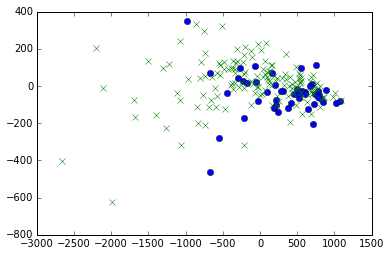

In [141]:
pca = PCA(n_components=Components)
transformed = pca.fit_transform(X)

plt.plot(transformed[:n1,0],transformed[:n1,1],'o')
plt.plot(transformed[n1:,0],transformed[n1:,1],'x')
plt.show()


<h2 style="color:purple"> ICA </h2>


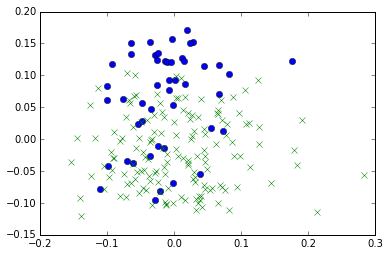

In [147]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components =Components)
transformedICA = ica.fit_transform(X)

plt.plot(transformedICA[:n1,0],transformedICA[:n1,1],'o')
plt.plot(transformedICA[n1:,0],transformedICA[n1:,1],'x')
plt.show()


<h2 style="color:purple"> LDA </h2>


(198L, 1L)


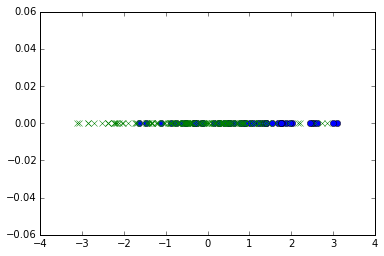

In [130]:
from sklearn.lda import LDA
lda = LDA()

transformed2 = lda.fit_transform(X,Y)
print transformed2.shape
plt.plot(transformed2[:n1,0],np.zeros(n1),'o')
plt.plot(transformed2[n1:,0],np.zeros(n2),'x')
plt.show()


<h2 style="color:purple"> Supervised Graph</h2>


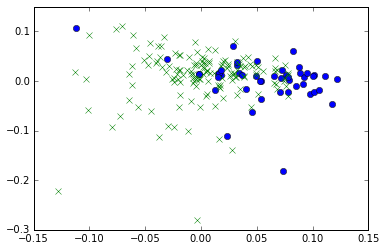

In [131]:
numFeature = X.shape[1]
numData = X.shape[0]
numNode = numFeature + numData + 2
A = np.zeros((numNode,numNode))

# construct feature-data
for i in range(numData):
    for j in xrange(numFeature):
        A[i+numFeature,j] = X.iloc[i,j]
        A[j,i+numFeature] = X.iloc[i,j]
# construct label- data
for i in range(numData):
    if Y[i] == 1:
        A[numFeature+numData+1,i] = 1
        A[i,numFeature+numData+1] = 1
    else:
        A[numFeature+numData,i] = 1
        A[i,numFeature+numData] = 1
        
vals,vecs = np.linalg.eig(A)
newRep2 = vecs[numFeature:numFeature+numData,:5]
plt.plot(newRep2[:n1,4],newRep2[:n1,3],'o')
plt.plot(newRep2[n1:,4],newRep2[n1:,3],'x')
plt.show()


<h2 style="color:purple"> Unsupervised Graph</h2>


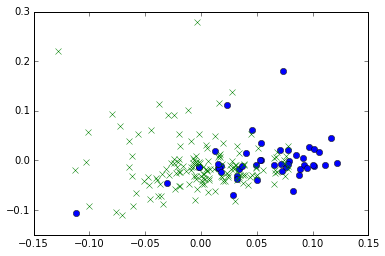

In [132]:
numFeature = X.shape[1]
numData = X.shape[0]
numNode = numFeature + numData
A = np.zeros((numNode,numNode))

# construct feature-data
for i in range(numData):
    for j in xrange(numFeature):
        A[i+numFeature,j] = X.iloc[i,j]
        A[j,i+numFeature] = X.iloc[i,j]

        
vals,vecs = np.linalg.eig(A)
newRep = vecs[numFeature:,:5]
plt.plot(newRep[:n1,4],newRep[:n1,3],'o')
plt.plot(newRep[n1:,4],newRep[n1:,3],'x')
plt.show()


<h2 style="color:green"> Classify </h2>


In [148]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
print dataName[datasetNum],":"

clf.fit(transformed,Y)
predict = clf.predict(transformed)
print "\tPCA:",(predict==Y).sum()/(1.0*Y.shape[0])

clf.fit(transformedICA,Y)
predict = clf.predict(transformedICA)
print "\tICA:",(predict==Y).sum()/(1.0*Y.shape[0])

clf.fit(transformed2,Y)
predict = clf.predict(transformed2)
print "\tLDA:",(predict==Y).sum()/(1.0*Y.shape[0])


clf.fit(newRep,Y)
predict = clf.predict(newRep)
print "\tunsupervised:",(predict==Y).sum()/(1.0*Y.shape[0])


clf.fit(newRep2,Y)
predict = clf.predict(newRep2)
print "\tsupervised:",(predict==Y).sum()/(1.0*Y.shape[0])


wpbc :
	PCA: 0.813131313131
	ICA: 0.792929292929
	LDA: 0.878787878788
	unsupervised: 0.737373737374
	supervised: 0.737373737374
